In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import pickle

In [41]:
data = np.genfromtxt('../../predictions/regression/1_42_R2 train 0.527 test 0.538.csv', delimiter=',')
preds = data[0:1,:].T
sigmas = data[1:2,:].T
trues = data[2:3,:].T

In [42]:
pred_cal = preds[0:150]
sigma_cal = sigmas[0:150]
pred_test = preds[150:]
sigma_test = sigmas[150:]

true_cal = trues[0:150]
true_test = trues[150:]

In [43]:
# Fake data - expected format!
#n_cal = 1000
#n_test = 500
#pred_cal = 5*np.random.rand(n_cal,1)
#sigma_cal = np.random.rand(n_cal,1)
#pred_test = np.random.rand(n_test,1)
#sigma_test = np.random.rand(n_test,1)
#
#true_cal = np.random.rand(n_cal,1)
#true_test = np.random.rand(n_test,1)

In [44]:
n_cal, n_classes = pred_cal.shape 
n_test = true_test.shape[0]
print(f'{n_cal} calibration points')
print(f'{n_test} test points')
print(f'{n_classes} classes')

150 calibration points
95 test points
1 classes


In [45]:
# scores
cal_scores = np.abs(pred_cal-true_cal)/sigma_cal
test_scores = np.abs(pred_test-true_test)/sigma_test

Coverage:0.9894736842105263
Avg width: 84.73031330861888


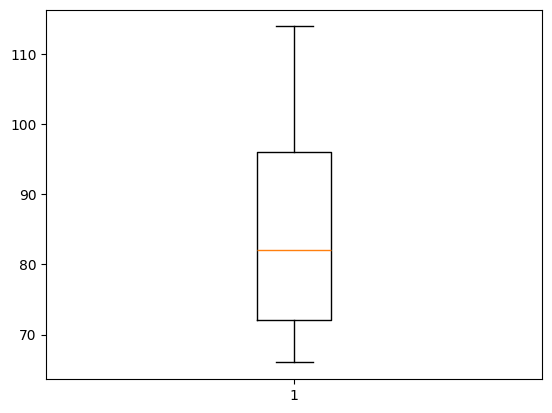

In [51]:
alpha = 0.1
q_level = np.ceil((n_cal+1)*(1-alpha))/n_cal
qhat = np.quantile(cal_scores, q_level, method = 'higher') # check quantile method

# test predictions
test_intervals = np.zeros((n_test,2))
test_intervals[:,0:1] = pred_test-qhat*sigma_test
test_intervals[:,1:] = pred_test+qhat*sigma_test

coverage = ((true_test<=test_intervals[:,1:]) & (true_test>=test_intervals[:,0:1])).sum()/n_test

print(f'Coverage:{coverage}')
widths = test_intervals[:,1]-test_intervals[:,0]
avg_width = widths.mean()

plt.boxplot(widths)
print(f'Avg width: {avg_width}')

array([[22.9258],
       [26.7678],
       [24.301 ],
       [24.3325],
       [23.0667],
       [32.8579],
       [52.2   ],
       [55.6446],
       [26.    ],
       [25.    ],
       [26.8   ],
       [32.2993],
       [36.7669],
       [41.347 ],
       [37.055 ],
       [30.8503],
       [36.7669],
       [34.8617],
       [37.0666],
       [36.0277],
       [24.7   ],
       [36.4738],
       [32.8579],
       [36.4738],
       [32.8579],
       [54.2501],
       [52.6   ],
       [56.4204],
       [41.4056],
       [35.1628],
       [34.7494],
       [34.9   ],
       [30.6   ],
       [31.7   ],
       [47.8478],
       [50.2436],
       [47.2   ],
       [46.9   ],
       [28.4   ],
       [27.9711],
       [50.4   ],
       [54.05  ],
       [59.7   ],
       [52.7496],
       [40.    ],
       [40.9   ],
       [40.5   ],
       [29.9499],
       [31.4   ],
       [56.9915],
       [46.5   ],
       [49.6   ],
       [42.    ],
       [49.9494],
       [45.3   ],
       [45